# Pandas Exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up the Environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [283]:
!pip install numpy
!pip install pandas

27542.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
27549.50s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Import the core data science libraries:

In [284]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the Raw Data
In this section, you will import the raw data into a `pandas` DataFrame.

In [285]:
df = pd.read_csv('data/arrests_national_juvenile.csv')

## Data Inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

1. Show 5 rows, selected at random, from the raw data set.

In [286]:
df.sample(5)


,id,year,state_abbr,offense_code,offense_name,agencies,population,total_male,total_female,m_0_9,...,f_13_14,f_15,f_16,f_17,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
460,641,2001,NaN,ASR_FAM,Offenses Against the Family and Children,10291,215369937,4255,2450,182.0,...,658.0,522.0,578.0,395,9966,214977919,5204,1319,113.0,49.0
401,702,2003,NaN,ASR_FOR,Forgery and Counterfeiting,11372,219455987,2259,1249,18.0,...,109.0,181.0,300.0,637,11059,218978486,2690,730,51.0,32.0
474,655,2001,NaN,ASR_SEX,Sex Offenses,10291,215369937,13110,1041,442.0,...,323.0,190.0,149.0,148,9966,214977919,9485,4357,180.0,93.0
38,1059,2015,NaN,ASR_DUI,Drive Under the Influence,13404,260792111,4004,1326,17.0,...,36.0,68.0,332.0,887,12728,259649328,4663,308,102.0,181.0
159,940,2011,NaN,ASR_EMB,Embezzlement,12628,250795788,201,129,NaN,...,10.0,7.0,28.0,81,12167,250082691,216,104,6.0,1.0


2. Show each of the column names and their data types.

In [287]:
df.dtypes

id                          int64
year                        int64
state_abbr                float64
offense_code               object
offense_name               object
agencies                    int64
population                  int64
total_male                  int64
total_female                int64
m_0_9                     float64
m_10_12                   float64
m_13_14                     int64
m_15                        int64
m_16                        int64
m_17                        int64
f_0_9                     float64
f_10_12                   float64
f_13_14                   float64
f_15                      float64
f_16                      float64
f_17                        int64
race_agencies               int64
race_population             int64
white                       int64
black                       int64
asian_pacific_islander    float64
american_indian           float64
dtype: object

3. Show all unique values within the `offense_name` column. This is helpful in understanding the different types of offenses recorded in the data set.

In [288]:
df['offense_name'].unique()

array(['Arson', 'Aggravated Assault', 'Simple Assault', 'Burglary',
       'Curfew and Loitering Law Violations', 'Disorderly Conduct',
       'Drug Abuse Violations', 'Drunkenness',
       'Drive Under the Influence', 'Embezzlement',
       'Offenses Against the Family and Children',
       'Forgery and Counterfeiting', 'Fraud', 'Gambling',
       'Murder and Nonnegligent Homicide', 'Liquor Laws', 'Larceny',
       'Manslaughter by Negligence', 'Motor Vehicle Theft',
       'All Other Offenses', 'Prostitution and Commercialized Vice',
       'Robbery', 'Rape', 'Runaway', 'Sex Offenses', 'Stolen Property',
       'Suspicion', 'Vagrancy', 'Vandalism', 'Weapons'], dtype=object)

## Data Munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

1. Set the `id` column as the index.

In [289]:
df.set_index('id', inplace=True)
df.sample(5)

,year,state_abbr,offense_code,offense_name,agencies,population,total_male,total_female,m_0_9,m_10_12,...,f_13_14,f_15,f_16,f_17,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
id,,,,,,,,,,,,,,,,,,,,,
871,2009,NaN,ASR_ARSON,Arson,12923,247547472,3727,573,206.0,696.0,...,216.0,110.0,83.0,60,12466,246779693,3289,880,61.0,58.0
825,2007,NaN,ASR_HOM,Murder and Nonnegligent Homicide,12363,235465952,967,78,1.0,6.0,...,9.0,16.0,17.0,36,11916,234827513,421,596,12.0,15.0
1012,2013,NaN,ASR_ROB,Robbery,12397,257195726,14562,1540,13.0,379.0,...,321.0,353.0,426.0,399,11925,248045485,4391,11479,139.0,63.0
472,1995,NaN,ASR_ROB,Robbery,10046,206783051,42876,4384,264.0,2125.0,...,1312.0,1069.0,919.0,789,9741,206316831,17457,28808,742.0,241.0
978,2012,NaN,ASR_MAN,Manslaughter by Negligence,12850,254953025,52,11,NaN,NaN,...,NaN,2.0,5.0,3,12341,254321505,44,16,2.0,NaN


2. Drop unnecessary columns from the dataframe to simplify our analysis.

In [290]:
# 'state_abbr' is dropped since all entries in this column are empty; the remaining fields are dropped due to irrelevance to our analysis.
drop_columns = ['state_abbr', 'offense_code', 'agencies', 'population', 'race_agencies', 'race_population'] 
df.drop(columns=drop_columns, inplace=True)
df.sample(5)

,year,offense_name,total_male,total_female,m_0_9,m_10_12,m_13_14,m_15,m_16,m_17,f_0_9,f_10_12,f_13_14,f_15,f_16,f_17,white,black,asian_pacific_islander,american_indian
id,,,,,,,,,,,,,,,,,,,,
932,2011,Aggravated Assault,24202,8041,264.0,2074.0,5328,4285,5543,6708,41.0,613.0,2054.0,1583.0,1835.0,1915,17954,13470,326.0,391.0
501,1996,Prostitution and Commercialized Vice,530,583,8.0,13.0,49,62,128,270,3.0,3.0,65.0,93.0,137.0,282,653,418,17.0,25.0
496,1996,Liquor Laws,80732,33949,133.0,557.0,6410,11580,23834,38218,60.0,455.0,4906.0,6465.0,9939.0,12124,103877,6372,983.0,3078.0
670,2002,Embezzlement,631,437,2.0,10.0,50,54,147,368,NaN,10.0,18.0,20.0,128.0,261,723,322,21.0,1.0
988,2012,Vagrancy,892,260,1.0,28.0,187,213,234,229,NaN,18.0,62.0,65.0,64.0,51,716,419,4.0,4.0


3. Handle missing values in the data set.

In [291]:
# Show 5 rows with missing data
df[df.isnull().any(axis=1)].sample(5)

,year,offense_name,total_male,total_female,m_0_9,m_10_12,m_13_14,m_15,m_16,m_17,f_0_9,f_10_12,f_13_14,f_15,f_16,f_17,white,black,asian_pacific_islander,american_indian
id,,,,,,,,,,,,,,,,,,,,
855,2008,Murder and Nonnegligent Homicide,926,66,1.0,7.0,61,141,278,438,NaN,1.0,10.0,12.0,23.0,20,391,580,12.0,5.0
1108,2016,Vagrancy,482,163,NaN,13.0,90,98,129,152,3.0,10.0,41.0,24.0,46.0,39,379,224,9.0,11.0
1065,2015,Murder and Nonnegligent Homicide,608,41,NaN,5.0,44,91,180,288,1.0,1.0,5.0,5.0,8.0,21,240,397,3.0,6.0
554,1998,Gambling,1390,41,7.0,15.0,166,243,396,563,2.0,2.0,6.0,8.0,8.0,15,249,1166,16.0,NaN
1101,2016,Prostitution and Commercialized Vice,112,297,NaN,2.0,20,13,31,46,1.0,2.0,26.0,42.0,68.0,158,165,231,9.0,3.0


We observe that a missing entry indicates that there are no juvenile arrests in this specific category. So, we can handle this by filling in missing values with zeros.

In [292]:
df.fillna(0, inplace=True)
df.sample(5)

,year,offense_name,total_male,total_female,m_0_9,m_10_12,m_13_14,m_15,m_16,m_17,f_0_9,f_10_12,f_13_14,f_15,f_16,f_17,white,black,asian_pacific_islander,american_indian
id,,,,,,,,,,,,,,,,,,,,
653,2001,Rape,3452,53,40.0,345.0,904,564,736,863,1.0,5.0,14.0,14.0,9.0,10,2043,1389,37.0,25.0
1003,2013,Fraud,2448,1177,9.0,113.0,412,370,631,913,1.0,31.0,150.0,185.0,304.0,506,2092,1382,55.0,73.0
738,2004,Manslaughter by Negligence,55,28,0.0,0.0,4,6,20,25,0.0,3.0,6.0,3.0,6.0,10,72,10,1.0,0.0
807,2006,Suspicion,248,68,1.0,7.0,39,53,70,78,0.0,3.0,20.0,15.0,19.0,11,205,108,3.0,0.0
704,2003,Gambling,1202,34,4.0,18.0,152,262,298,468,0.0,3.0,2.0,4.0,10.0,15,145,1067,21.0,3.0


4. Add necessary columns to the dataframe to use in our analysis.

In [293]:
# total number of arrests
df['total'] = df['total_male'] + df['total_female']

# total number of arrests by age group
df['total_0_9'] = df['m_0_9'] + df['f_0_9']
df['total_10_12'] = df['m_10_12'] + df['f_10_12']
df['total_13_14'] = df['m_13_14'] + df['f_13_14']
df['total_15'] = df['m_15'] + df['f_15']
df['total_16'] = df['m_16'] + df['f_16']
df['total_17'] = df['m_17'] + df['f_17']

df.sample(5)

,year,offense_name,total_male,total_female,m_0_9,m_10_12,m_13_14,m_15,m_16,m_17,...,black,asian_pacific_islander,american_indian,total,total_0_9,total_10_12,total_13_14,total_15,total_16,total_17
id,,,,,,,,,,,,,,,,,,,,,
969,2012,Drive Under the Influence,5595,1933,14.0,8.0,86,212,1243,4032,...,376,103.0,127.0,7528,20.0,12.0,114.0,300.0,1711.0,5371
709,2003,Motor Vehicle Theft,26847,5475,54.0,740.0,5610,6212,7098,7133,...,12948,700.0,450.0,32322,61.0,921.0,7060.0,7614.0,8435.0,8231
601,2000,Arson,5411,732,621.0,1276.0,1586,766,627,535,...,1187,67.0,65.0,6143,674.0,1457.0,1861.0,866.0,696.0,589
803,2006,Rape,2596,46,13.0,211.0,719,448,565,640,...,897,22.0,30.0,2642,16.0,217.0,731.0,453.0,578.0,647
778,2005,Vagrancy,2530,929,3.0,112.0,640,616,728,431,...,686,26.0,12.0,3459,5.0,156.0,931.0,860.0,971.0,536


## Data Analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute as an analysis.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

1. Compute and display the average number of juvenile arrests per year from 1994 to 2016.

In [294]:
average_per_year = df.groupby('year')['total'].mean() #grouping rows by 'year'
average_per_year

year
1994    74026.133333
1995    74246.933333
1996    71981.900000
1997    71487.733333
1998    65157.433333
1999    58851.666667
2000    57769.900000
2001    57442.266667
2002    56927.900000
2003    55897.300000
2004    55002.200000
2005    55634.000000
2006    56280.100000
2007    57004.966667
2008    55655.266667
2009    51335.866667
2010    46265.633333
2011    41325.933333
2012    37713.933333
2013    34439.700000
2014    29074.766667
2015    26426.533333
2016    24749.433333
Name: total, dtype: float64

2. Compute and display the top 10 offense types with the highest total number of juvenile arrests.

In [295]:
total_by_offense = df.groupby('offense_name')['total'].sum() # group rows by 'offense_name'
total_by_offense.sort_values(ascending=False).head(10) # sort in descending order

offense_name
All Other Offenses                     6161670
Larceny                                5804136
Simple Assault                         3781041
Drug Abuse Violations                  3120702
Disorderly Conduct                     2927850
Curfew and Loitering Law Violations    2189268
Runaway                                2168787
Liquor Laws                            2096932
Vandalism                              1741261
Burglary                               1479656
Name: total, dtype: int64

3. Compute and display the percentage distribution of juvenile arrests between males and females for the top 10 offense types.

In [296]:
percentage_by_gender_for_offense = df.groupby('offense_name')[['total_male', 'total_female', 'total']].sum() # group rows by 'offense_name'

percentage_by_gender_for_offense['percent_male'] = (percentage_by_gender_for_offense['total_male'] / percentage_by_gender_for_offense['total']) * 100
percentage_by_gender_for_offense['percent_female'] = (percentage_by_gender_for_offense['total_female'] / percentage_by_gender_for_offense['total']) * 100

percentage_by_gender_for_offense.sort_values(by='total', ascending=False)[['percent_male', 'percent_female']].head(10) # sort in descending order

,percent_male,percent_female
offense_name,,
All Other Offenses,74.403433,25.596567
Larceny,61.411052,38.588948
Simple Assault,67.456396,32.543604
Drug Abuse Violations,84.412321,15.587679
Disorderly Conduct,69.610977,30.389023
Curfew and Loitering Law Violations,69.752082,30.247918
Runaway,43.058124,56.941876
Liquor Laws,65.523489,34.476511
Vandalism,86.959164,13.040836


4. Compute and display the percentage distribution of juvenile arrests across different age groups in descending order.

In [297]:
age_groups = ['total_0_9', 'total_10_12', 'total_13_14', 'total_15', 'total_16', 'total_17']

total_by_age = df[age_groups].sum()
total = total_by_age.sum()
percentage_by_age = (total_by_age / total) * 100

percentage_by_age.sort_values(ascending=False) # sort in descending order

total_17       26.369803
total_16       23.648022
total_13_14    22.700379
total_15       19.392935
total_10_12     6.764913
total_0_9       1.123948
dtype: float64

5. Compute and display the total number of juvenile arrests per year for different racial groups.

In [298]:
total_per_year_by_race = df.groupby('year')[['white', 'black', 'asian_pacific_islander', 'american_indian']].sum() # group rows by 'year'
total_per_year_by_race

,white,black,asian_pacific_islander,american_indian
year,,,,
1994,1520901,633446,38115.0,23784.0
1995,1512021,649321,37993.0,25112.0
1996,1504511,586156,39132.0,26289.0
1997,1486060,589429,37991.0,27050.0
1998,1365993,524117,30920.0,22197.0
1999,1239431,470998,28787.0,21947.0
2000,1215726,461366,27778.0,21303.0
2001,1195324,477832,26480.0,20001.0
2002,1203755,451015,27944.0,21426.0


## Data Visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

1. Use a line chart to visualize the trend in the average number of juvenile arrests per year from 1994 to 2016.

Text(0, 0.5, 'Average Arrests')

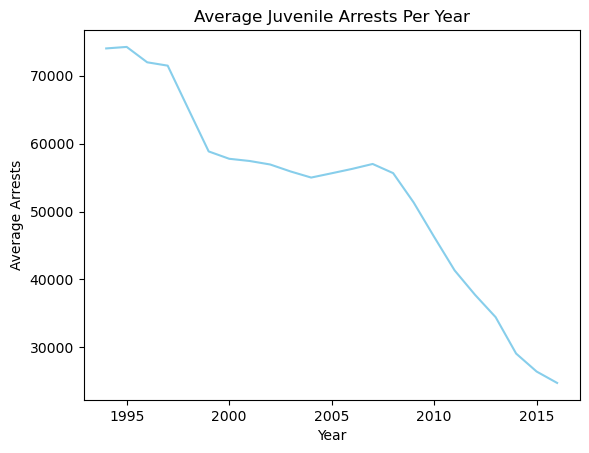

In [299]:
plt.plot(average_per_year, color='skyblue')
plt.title('Average Juvenile Arrests Per Year')
plt.xlabel('Year')
plt.ylabel('Average Arrests')


2. Use a horizontal bar chart to visualize the total number of juvenile arrests for each type of offense.

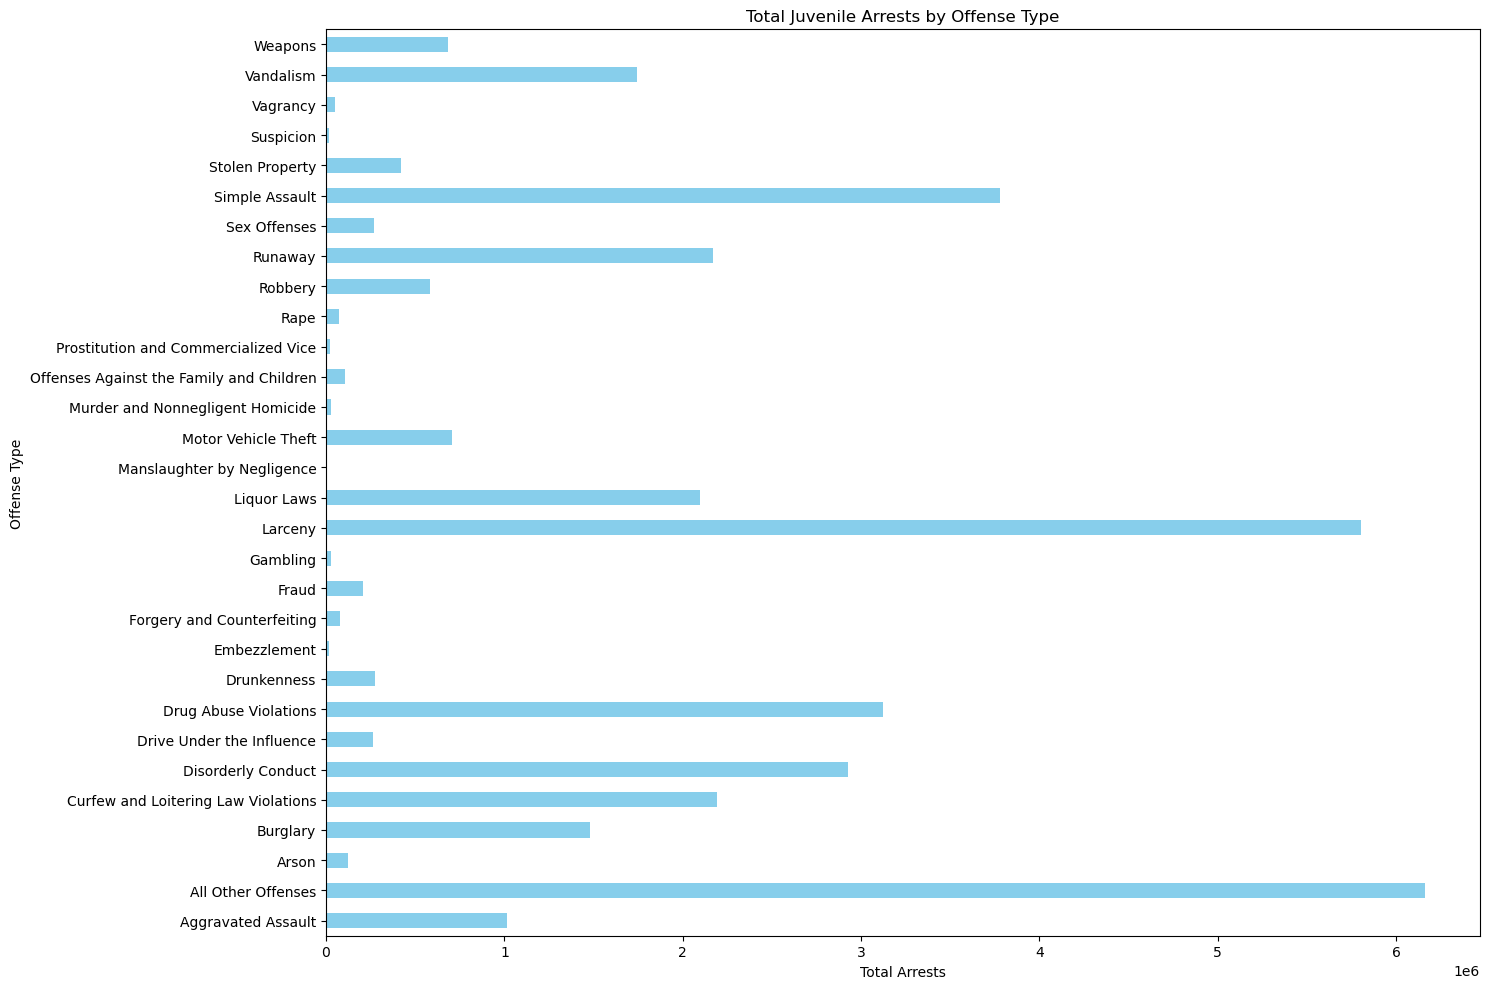

In [300]:
plt.figure(figsize=(15, 10))
total_by_offense.plot.barh(color='skyblue')

plt.title('Total Juvenile Arrests by Offense Type')
plt.xlabel('Total Arrests')
plt.ylabel('Offense Type')

plt.tight_layout()

3. Use a stacked bar chart to visualize the percentage distribution of juvenile arrests by gender for each type of offense.

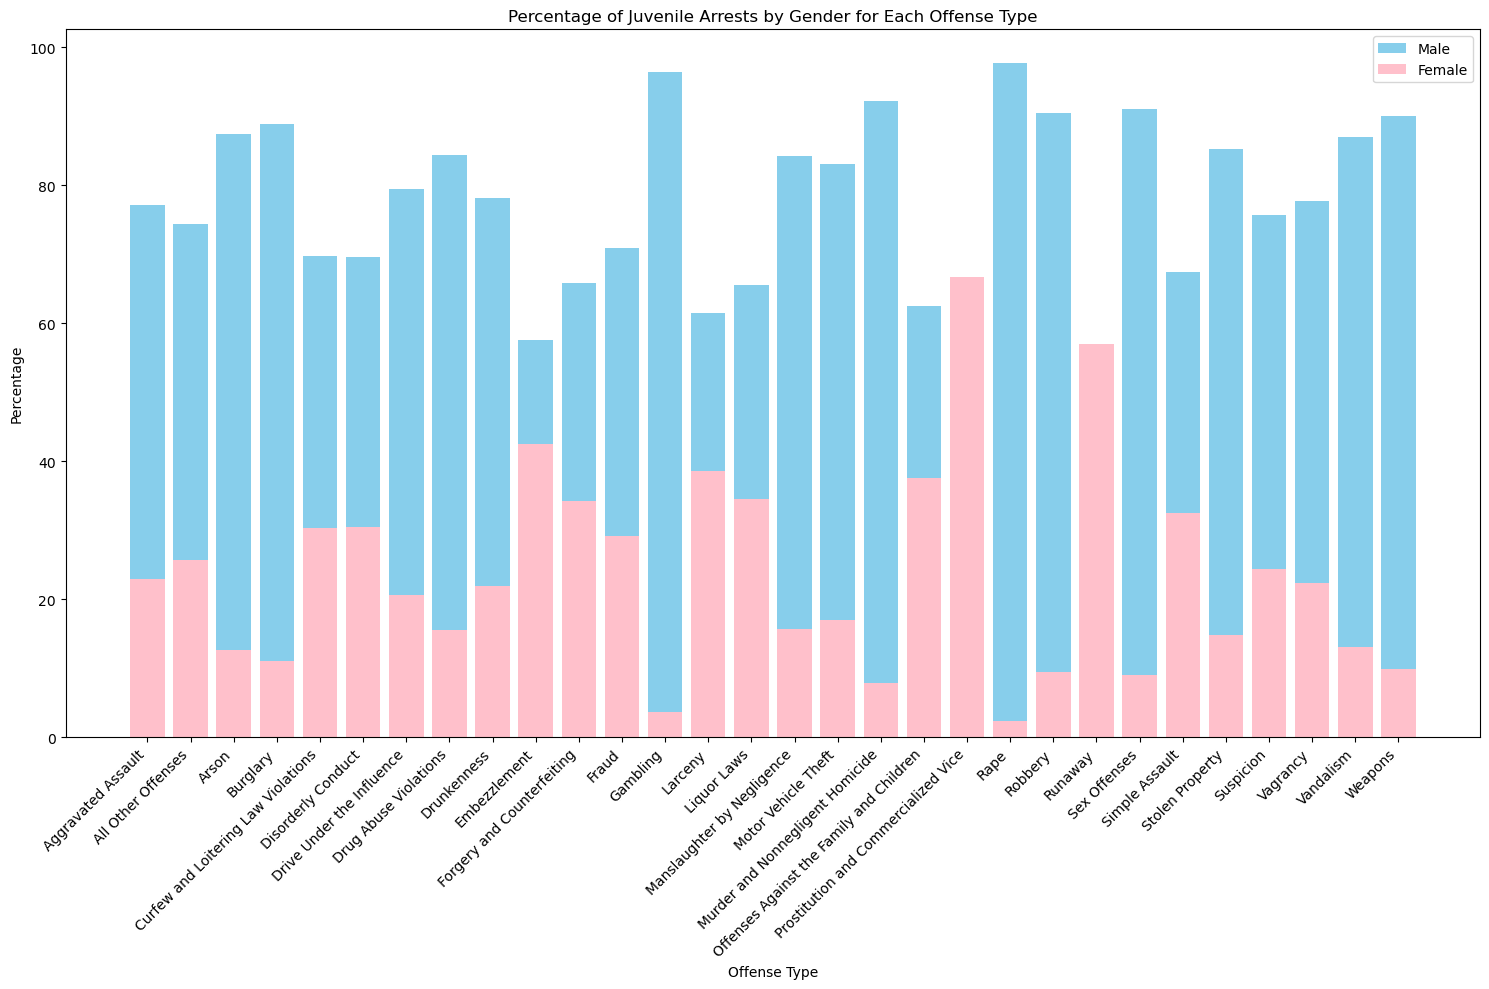

In [301]:
plt.figure(figsize=(15, 10))
plt.bar(percentage_by_gender_for_offense.index, percentage_by_gender_for_offense['percent_male'], label='Male', color='skyblue')
plt.bar(percentage_by_gender_for_offense.index, percentage_by_gender_for_offense['percent_female'], label='Female', color='pink')

plt.title('Percentage of Juvenile Arrests by Gender for Each Offense Type')
plt.xlabel('Offense Type')
plt.ylabel('Percentage')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()

4. Use a pie chart to visualize the percentage distribution of juvenile arrests by age, with each slice indicating the percentage of total arrests made up by the specific age group. 

Text(0.5, 1.0, 'Percentage of Juvenile Arrests by Age Group')

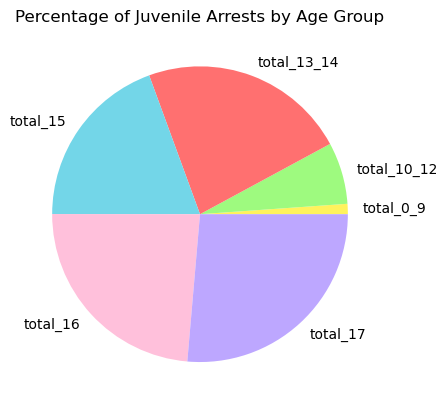

In [302]:
plt.pie(percentage_by_age, labels=percentage_by_age.index, colors=['#fff25d', '#9efa7f', '#ff7070', '#73d6e8', '#ffc0db', '#bda7ff'])
plt.title('Percentage of Juvenile Arrests by Age Group')


5. Use a stacked area chart to visualize the trend in the total number of juvenile arrests per year from 1994 to 2016 for each racial group.

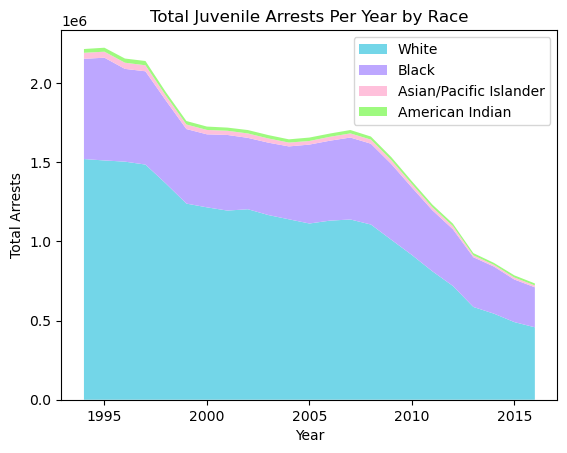

In [303]:
plt.stackplot(total_per_year_by_race.index, 
              [total_per_year_by_race['white'], 
               total_per_year_by_race['black'], 
               total_per_year_by_race['asian_pacific_islander'], 
               total_per_year_by_race['american_indian']],
              labels=['White', 'Black', 'Asian/Pacific Islander', 'American Indian'],
              colors=['#73d6e8', '#bda7ff', '#ffc0db','#9efa7f'])

plt.title('Total Juvenile Arrests Per Year by Race')
plt.xlabel('Year')
plt.ylabel('Total Arrests')
plt.legend()
